# Course Project-1
### CSL7360 - Computer Vision
Aayush Gautam(B20EE002) \\
Akshat Jain(B20AI054) \\
Deep Vasan(B20CS083) \\
Dev Goel(B20CS090)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import tensorflow as tf
from PIL import Image as im
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import cv2
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from skimage.feature import local_binary_pattern

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from google.colab.patches import cv2_imshow
import plotly.graph_objects as go

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


##Global Variables

In [ ]:
quickdraw_dataset_path = "/content/drive/MyDrive/CV_Datasets/Quick_Draw"

In [ ]:
!mkdir quickdraw_dataset_path

## Importing Dataset


### Quickdraw Dataset

In [ ]:
# import os
# import requests
# import zipfile

# # Function to download and extract the dataset
# def download_quickdraw_dataset(categories, save_path):
#     # Base URL for downloading the dataset
#     base_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap"

#     # Create the save directory if it doesn't exist
#     if not os.path.exists(save_path):
#         os.makedirs(save_path)

#     # Download and extract each category
#     for category in categories:
#         category_url = f"{base_url}/{category}.npy"
#         save_file = os.path.join(save_path, f"{category}.npy")

#         # Download the file
#         response = requests.get(category_url)
#         with open(save_file, "wb") as f:
#             f.write(response.content)

#         print(f"Downloaded: {category}.npy")

# # Example usage
# classes = ["airplane", "ambulance", "angel", "ant", "anvil", "apple", "arm", "asparagus", "axe", "backpack", "banana", "bandage", "barn", "baseball", "basket", "basketball", "bat", "bathtub", "beach", "bear", "beard", "bed", "bee", "belt", "bench", "bicycle", "binoculars", "bird", "birthday cake", "blackberry", "blueberry", "book", "boomerang", "bottlecap", "bowtie", "bracelet", "brain", "bread", "bridge", "broccoli", "broom", "bucket", "bulldozer", "bus", "bush", "butterfly", "cactus", "cake", "calculator", "calendar", "camel", "camera", "camouflage", "campfire", "candle", "cannon", "canoe", "car", "carrot", "castle", "cat", "cello", "chair", "chandelier", "church", "circle", "clarinet", "clock", "cloud", "coffee cup", "compass", "computer", "cookie", "cooler", "couch", "cow", "crab", "crayon", "crocodile", "crown", "cup", "diamond", "dishwasher", "dog", "dolphin", "donut", "door", "dragon", "dresser", "drill", "drums", "duck", "dumbbell", "ear", "elbow", "elephant", "envelope", "eraser", "eye", "eyeglasses", "face", "fan", "feather", "fence", "finger", "fireplace", "firetruck", "fish", "flamingo", "flashlight", "flower", "foot", "fork", "frog", "garden", "giraffe", "goatee", "grapes", "grass", "guitar", "hamburger", "hammer", "hand", "harp", "hat", "headphones", "hedgehog", "helicopter", "helmet", "hexagon", "hockey stick", "horse", "hospital", "hourglass", "house", "hurricane", "jacket", "jail", "kangaroo", "key", "keyboard", "knee", "knife", "ladder", "lantern", "laptop", "leaf", "leg", "lighter", "lighthouse", "lightning", "line", "lion", "lipstick", "lobster", "lollipop", "mailbox", "map", "marker", "matches", "megaphone", "mermaid", "microphone", "microwave", "monkey", "moon", "mosquito", "motorbike", "mountain", "mouse", "moustache", "mouth", "mug", "mushroom", "nail", "necklace", "nose", "ocean", "octagon", "octopus", "onion", "oven", "owl", "paintbrush", "paint can", "palm tree", "panda", "pants", "parachute", "parrot", "passport", "peanut", "pear", "peas", "pencil", "penguin", "piano", "pig", "pillow", "pineapple", "pizza", "pliers", "pond", "pool", "popsicle", "postcard", "potato", "purse", "rabbit", "raccoon", "radio", "rain", "rainbow", "rake", "rhinoceros", "rifle", "river", "rollerskates", "sailboat", "sandwich", "saw", "saxophone", "school bus", "scissors", "scorpion", "screwdriver", "sea turtle", "shark", "sheep", "shoe", "shorts", "shovel", "sink", "skateboard", "skull", "skyscraper", "smiley face", "snail", "snake", "snorkel", "snowflake", "snowman", "sock", "speedboat", "spider", "spoon", "spreadsheet", "square", "squiggle", "squirrel", "stairs", "star", "steak", "stereo", "stethoscope", "stitches", "stove", "strawberry", "streetlight", "string bean", "submarine", "suitcase", "sun", "swan", "sweater", "swing set", "sword", "syringe", "table", "teapot", "teddy-bear", "telephone", "television", "tennis racquet", "tent", "The Eiffel Tower", "The Great Wall of China", "The Mona Lisa", "tiger", "toaster", "toe", "toilet", "tooth", "toothbrush", "toothpaste", "tornado", "tractor", "traffic light", "train", "tree", "triangle", "trombone", "truck", "trumpet", "t-shirt", "umbrella", "underwear", "van", "vase", "violin", "washing machine", "watermelon", "waterslide", "whale", "wheel", "windmill", "wine bottle", "wine glass", "wristwatch", "yoga", "zebra", "zigzag"]

# categories_to_download = classes[:100]  # Specify the categories you want to download
# save_directory = "/content/drive/MyDrive/CV_Datasets/Quick_Draw/"  # Specify where you want to save the data

# download_quickdraw_dataset(categories_to_download, save_directory)


Downloaded: airplane.npy
Downloaded: ambulance.npy
Downloaded: angel.npy
Downloaded: ant.npy
Downloaded: anvil.npy
Downloaded: apple.npy
Downloaded: arm.npy
Downloaded: asparagus.npy
Downloaded: axe.npy
Downloaded: backpack.npy
Downloaded: banana.npy
Downloaded: bandage.npy
Downloaded: barn.npy
Downloaded: baseball.npy
Downloaded: basket.npy
Downloaded: basketball.npy
Downloaded: bat.npy
Downloaded: bathtub.npy
Downloaded: beach.npy
Downloaded: bear.npy
Downloaded: beard.npy
Downloaded: bed.npy
Downloaded: bee.npy
Downloaded: belt.npy
Downloaded: bench.npy
Downloaded: bicycle.npy
Downloaded: binoculars.npy
Downloaded: bird.npy
Downloaded: birthday cake.npy
Downloaded: blackberry.npy
Downloaded: blueberry.npy
Downloaded: book.npy
Downloaded: boomerang.npy
Downloaded: bottlecap.npy
Downloaded: bowtie.npy
Downloaded: bracelet.npy
Downloaded: brain.npy
Downloaded: bread.npy
Downloaded: bridge.npy
Downloaded: broccoli.npy
Downloaded: broom.npy
Downloaded: bucket.npy
Downloaded: bulldozer.np

KeyboardInterrupt: 

In [ ]:
data_sets = glob.glob(os.path.join('/content/drive/MyDrive/CV_Datasets/Quick_Draw/*.npy'))
print(len(data_sets))
data_sets = data_sets[:20]

In [ ]:
data_sets

## Loading and Preprocessing Dataset


###Loading the data

In [ ]:
# Updated

classes = ["airplane", "ambulance", "angel", "ant", "anvil", "apple", "arm", "asparagus", "axe", "backpack", "banana", "bandage", "barn", "baseball", "basket", "basketball", "bat", "bathtub", "beach", "bear", "beard", "bed", "bee", "belt", "bench", "bicycle", "binoculars", "bird", "birthday cake", "blackberry", "blueberry", "book", "boomerang", "bottlecap", "bowtie", "bracelet", "brain", "bread", "bridge", "broccoli", "broom", "bucket", "bulldozer", "bus", "bush", "butterfly", "cactus", "cake", "calculator", "calendar", "camel", "camera", "camouflage", "campfire", "candle", "cannon", "canoe", "car", "carrot", "castle", "cat", "cello", "chair", "chandelier", "church", "circle", "clarinet", "clock", "cloud", "coffee cup", "compass", "computer", "cookie", "cooler", "couch", "cow", "crab", "crayon", "crocodile", "crown", "cup", "diamond", "dishwasher", "dog", "dolphin", "donut", "door", "dragon", "dresser", "drill", "drums", "duck", "dumbbell", "ear", "elbow", "elephant", "envelope", "eraser", "eye", "eyeglasses", "face", "fan", "feather", "fence", "finger", "fireplace", "firetruck", "fish", "flamingo", "flashlight", "flower", "foot", "fork", "frog", "garden", "giraffe", "goatee", "grapes", "grass", "guitar", "hamburger", "hammer", "hand", "harp", "hat", "headphones", "hedgehog", "helicopter", "helmet", "hexagon", "hockey stick", "horse", "hospital", "hourglass", "house", "hurricane", "jacket", "jail", "kangaroo", "key", "keyboard", "knee", "knife", "ladder", "lantern", "laptop", "leaf", "leg", "lighter", "lighthouse", "lightning", "line", "lion", "lipstick", "lobster", "lollipop", "mailbox", "map", "marker", "matches", "megaphone", "mermaid", "microphone", "microwave", "monkey", "moon", "mosquito", "motorbike", "mountain", "mouse", "moustache", "mouth", "mug", "mushroom", "nail", "necklace", "nose", "ocean", "octagon", "octopus", "onion", "oven", "owl", "paintbrush", "paint can", "palm tree", "panda", "pants", "parachute", "parrot", "passport", "peanut", "pear", "peas", "pencil", "penguin", "piano", "pig", "pillow", "pineapple", "pizza", "pliers", "pond", "pool", "popsicle", "postcard", "potato", "purse", "rabbit", "raccoon", "radio", "rain", "rainbow", "rake", "rhinoceros", "rifle", "river", "rollerskates", "sailboat", "sandwich", "saw", "saxophone", "school bus", "scissors", "scorpion", "screwdriver", "sea turtle", "shark", "sheep", "shoe", "shorts", "shovel", "sink", "skateboard", "skull", "skyscraper", "smiley face", "snail", "snake", "snorkel", "snowflake", "snowman", "sock", "speedboat", "spider", "spoon", "spreadsheet", "square", "squiggle", "squirrel", "stairs", "star", "steak", "stereo", "stethoscope", "stitches", "stove", "strawberry", "streetlight", "string bean", "submarine", "suitcase", "sun", "swan", "sweater", "swing set", "sword", "syringe", "table", "teapot", "teddy-bear", "telephone", "television", "tennis racquet", "tent", "The Eiffel Tower", "The Great Wall of China", "The Mona Lisa", "tiger", "toaster", "toe", "toilet", "tooth", "toothbrush", "toothpaste", "tornado", "tractor", "traffic light", "train", "tree", "triangle", "trombone", "truck", "trumpet", "t-shirt", "umbrella", "underwear", "van", "vase", "violin", "washing machine", "watermelon", "waterslide", "whale", "wheel", "windmill", "wine bottle", "wine glass", "wristwatch", "yoga", "zebra", "zigzag"]

from sklearn.model_selection import train_test_split

dataset_path = '/content/drive/MyDrive/CV_Datasets/Quick_Draw'
selected_classes = classes[:20]
print(selected_classes)
train_data = []
test_data = []
test_labels = []
train_labels = []
split_ratio = 0.8

for class_name in os.listdir(dataset_path)[:20]:
    file_path = os.path.join(dataset_path, class_name)
    class_data = np.load(file_path)[:1000]  # selecting only 6000 images for each class
    num_samples = class_data.shape[0]

    # Create labels for the class
    class_labels = np.full((num_samples,), selected_classes.index(class_name.split('.')[0]))

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        class_data, class_labels, train_size=split_ratio, random_state=96)

    # Append the train and test data and labels to the respective lists
    train_data.append(X_train)
    test_data.append(X_test)
    train_labels.append(y_train)
    test_labels.append(y_test)

# Concatenate the train and test data and labels for all classes
x_train = np.concatenate(train_data)
x_test = np.concatenate(test_data)
y_train = np.concatenate(train_labels)
y_test = np.concatenate(test_labels)
print("total Train images: ", x_train.shape[0])
print("total Test images: ", x_test.shape[0])

['airplane', 'ambulance', 'angel', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear']
total Train images:  16000
total Test images:  4000


In [ ]:
print(x_train.shape)

(16000, 784)


In [ ]:
image_size = 28
x_train_reshaped = x_train.reshape(x_train.shape[0], image_size, image_size)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_size, image_size)


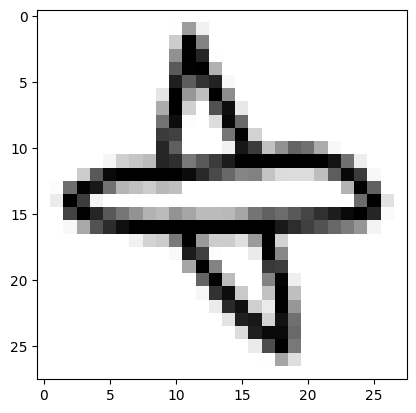

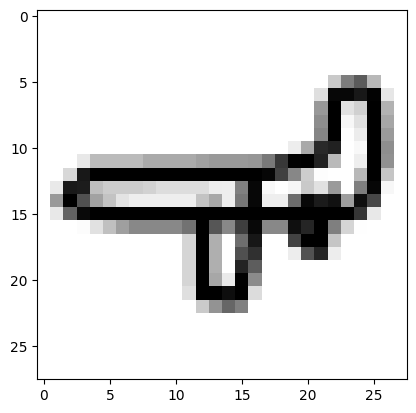

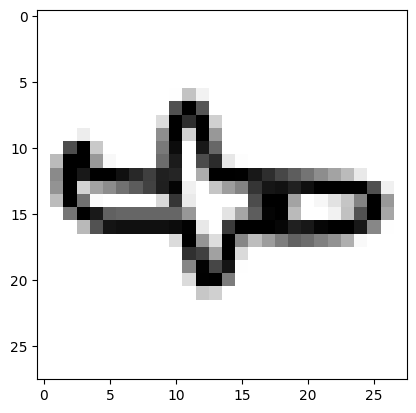

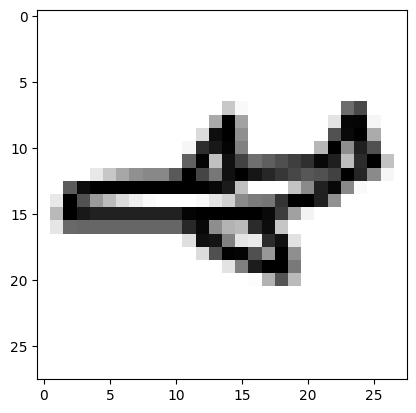

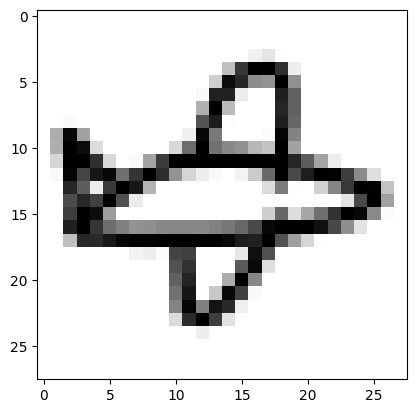

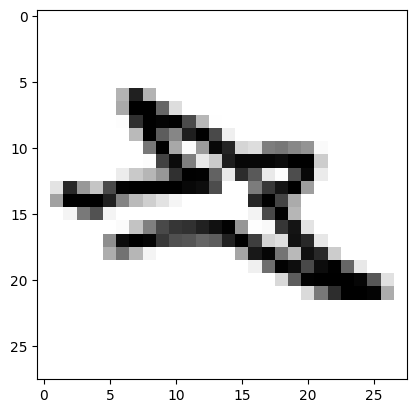

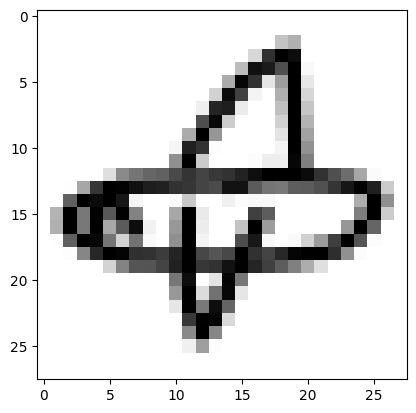

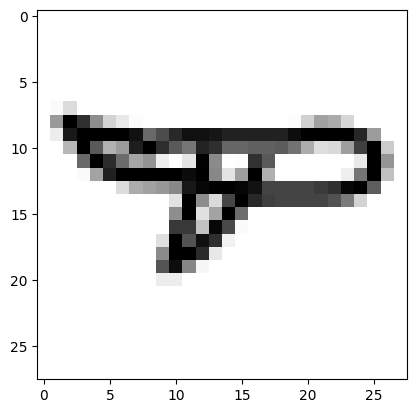

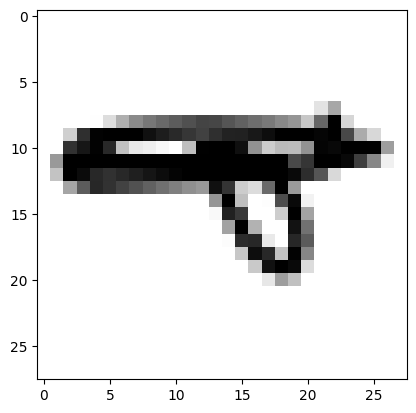

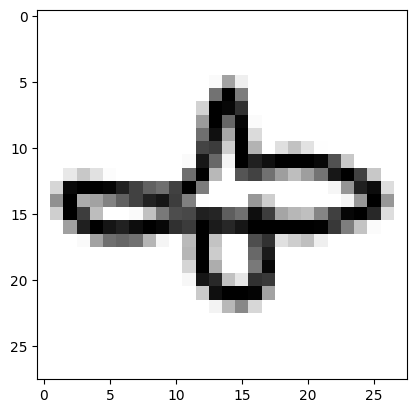

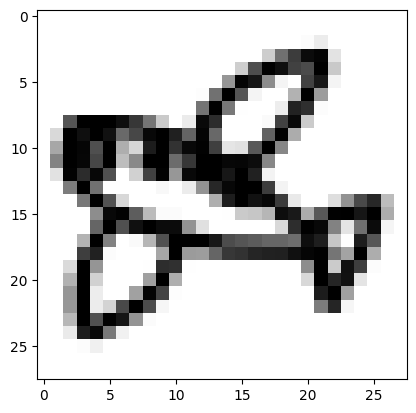

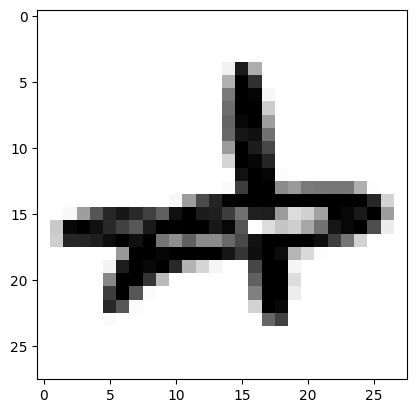

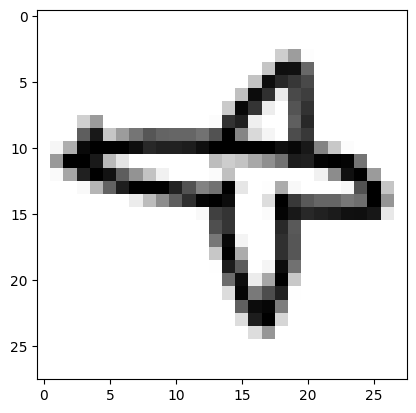

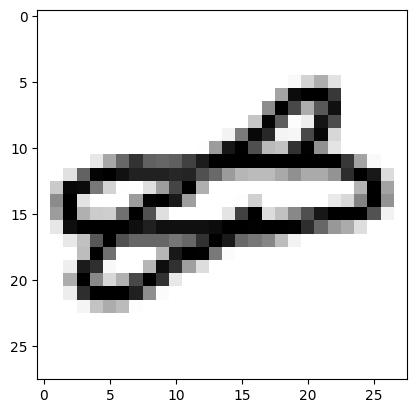

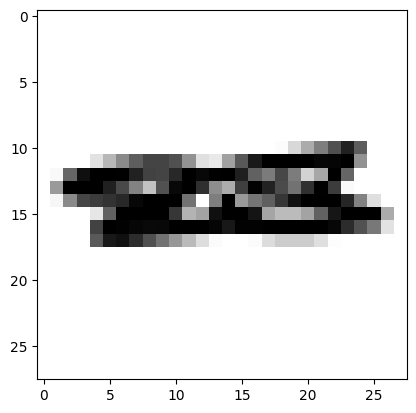

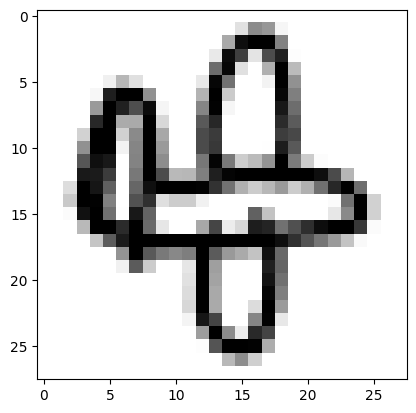

In [ ]:
for i in range(16):
  plt.grid(False)
  plt.imshow(x_train_reshaped[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
print(x_train_reshaped[0].shape)

(28, 28)


In [ ]:
len(x_train_reshaped[34])

28

In [ ]:
cv2.imwrite('color_img.jpg', x_train_reshaped[10])

True

In [ ]:
x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
image = cv2.imdecode(x_train_reshaped[0][0], cv2.IMREAD_GRAYSCALE)

In [ ]:
(x.shape)

(28, 28)

In [ ]:
cv2_imshow(x)

denoised = denoise_image(x)
# denoised = denoise_image(denoised)
# cv2_imshow(denoised)
denoised.shape

(28, 28)

In [ ]:
image1 = cv2.resize(denoised, (500,500), interpolation=cv2.INTER_AREA)

In [ ]:
cv2_imshow(denoised)
# image2 = cv2.resize(x, (500,500), interpolation=cv2.INTER_AREA)
# cv2_imshow(image2)

## Image Enhancement

### Denoising

In [ ]:
def denoise_image(image):

    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.medianBlur(image, 3)

    if len(image.shape) == 3:
        denoised = cv2.cvtColor(denoised, cv2.COLOR_GRAY2BGR)

    return denoised

In [ ]:
denoised_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  denoised_x_train.append(x)


denoised_x_train=np.array(denoised_x_train)
denoised_x_train=denoised_x_train.reshape(-1,784)

In [ ]:
denoised_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  denoised_x_test.append(x)


denoised_x_test=np.array(denoised_x_test)
denoised_x_test=denoised_x_test.reshape(-1,784)

### Contrast Enhancement

In [ ]:
def enhance_contrast(image):
    equalized = cv2.equalizeHist(image)

    return equalized

In [ ]:
contrast_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=enhance_contrast(x)
  contrast_x_train.append(x)
contrast_x_train=np.array(contrast_x_train)
contrast_x_train=contrast_x_train.reshape(-1,784)

In [ ]:
contrast_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=enhance_contrast(x)
  contrast_x_test.append(x)


contrast_x_test=np.array(contrast_x_test)
contrast_x_test=contrast_x_test.reshape(-1,784)

### Filtering

In [ ]:
def apply_filter(image, filter_type, kernel_size):

    if filter_type == 'gaussian':
        kernel = cv2.getGaussianKernel(kernel_size, 0)
        kernel = np.outer(kernel, kernel.transpose())
    elif filter_type == 'sobel_x':
        kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
    elif filter_type == 'sobel_y':
        kernel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])
    elif filter_type == 'laplacian':
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
    else:
        raise ValueError('Invalid filter type')

    filtered = cv2.filter2D(image, -1, kernel)

    return filtered

In [ ]:
filter_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_filter(x,'gaussian', 3)
  filter_x_train.append(x)
filter_x_train=np.array(filter_x_train)
filter_x_train=filter_x_train.reshape(-1,784)

In [ ]:
filter_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_filter(x, 'gaussian', 3)
  filter_x_test.append(x)


filter_x_test=np.array(filter_x_test)
filter_x_test=filter_x_test.reshape(-1,784)

### CLAHE Image Processing

In [ ]:
def apply_clahe(image, clip_limit=2.0, tile_size=(8, 8)):

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    enhanced = clahe.apply(image)

    return enhanced

In [ ]:
clahe_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_clahe(x)
  clahe_x_train.append(x)
clahe_x_train=np.array(clahe_x_train)
clahe_x_train=clahe_x_train.reshape(-1,784)

In [ ]:
clahe_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_clahe(x)
  clahe_x_test.append(x)


clahe_x_test=np.array(clahe_x_test)
clahe_x_test=clahe_x_test.reshape(-1,784)

### Image Smoothening & Sharpening

In [ ]:
def smooth_and_sharpen(image):
    blurred = cv2.GaussianBlur(image, (5,5), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_8U, ksize=3)

    sharpened = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)

    return sharpened

In [ ]:
sharp_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=smooth_and_sharpen(x)
  sharp_x_train.append(x)
sharp_x_train=np.array(sharp_x_train)
sharp_x_train=sharp_x_train.reshape(-1,784)

In [ ]:
sharp_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=smooth_and_sharpen(x)
  sharp_x_test.append(x)


sharp_x_test=np.array(sharp_x_test)
sharp_x_test=sharp_x_test.reshape(-1,784)

### HOG Features

In [ ]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt


# Extract HOG features for training images
hog_features_train = []
for img_id in range(x_train.shape[0]):
    if(img_id%1000==0):
        print(img_id)
    fd = hog(x_train[img_id].reshape((28, 28)), orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))
    hog_features_train.append(fd)
hog_features_train = np.array(hog_features_train)
print(hog_features_train.shape)

# Extract HOG features for testing images
hog_features_test = []
for img_id in range(x_test.shape[0]):
    fd = hog(x_test[img_id].reshape((28, 28)), orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))
    hog_features_test.append(fd)
hog_features_test = np.array(hog_features_test)

print(hog_features_test.shape)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
(16000, 392)
(4000, 392)


###Corners

In [ ]:
from skimage.color.colorconv import gray2rgba
def extract_corners(image):
    image = image.astype(np.uint8)

    max_corners = 100
    quality_level = 0.3
    min_distance = 7
    block_size = 7

    corners = cv2.goodFeaturesToTrack(image, 27, 0.01, 10)
    corners = np.int0(corners)
    for i in corners:
      x, y = i.ravel()
      cv2.circle(image, (x, y), 3, 255, -1)

    return image

In [ ]:
features["Corner Detection"]=extract_corners(x_train_reshaped[0])

<ipython-input-34-9a4f32be5416>:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [ ]:
corner_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=extract_corners(x)
  corner_x_train.append(x)
corner_x_train=np.array(corner_x_train)
corner_x_train=corner_x_train.reshape(-1,784)

<ipython-input-34-9a4f32be5416>:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [ ]:
corner_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=extract_corners(x)
  corner_x_test.append(x)


corner_x_test=np.array(corner_x_test)
corner_x_test=corner_x_test.reshape(-1,784)

<ipython-input-34-9a4f32be5416>:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


###Edges

In [ ]:
def detect_edges(image):
    image = image.astype(np.uint8)
    gray = image

    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    blurred = blurred.astype(np.uint8)
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    return edges

In [ ]:
features["Edge Detection"]=detect_edges(x_train_reshaped[0])

In [ ]:
edge_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=detect_edges(x)
  edge_x_train.append(x)
edge_x_train=np.array(edge_x_train)
edge_x_train=edge_x_train.reshape(-1,784)

In [ ]:
edge_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=detect_edges(x)
  edge_x_test.append(x)
edge_x_test=np.array(edge_x_test)
edge_x_test=edge_x_test.reshape(-1,784)

## Data Augmentation

###Rotation

In [ ]:
def rotate_image(image, angle):
    # Get the dimensions of the input image
    height, width = image.shape[:2]

    # Calculate the rotation matrix using the specified angle
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

    # Apply the rotation matrix to the input image using cv2.warpAffine()
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image

In [ ]:
rotated_x_train=[]
for img in x_train_reshaped:
  x=rotate_image(img,5)
  rotated_x_train.append(x)
rotated_x_train=np.array(rotated_x_train)
rotated_x_train=rotated_x_train.reshape(-1,784)

### Horizontal Flipping

In [ ]:
def horizontal_flip(image):
    # Flip the input image horizontally using cv2.flip()
    flipped_image = cv2.flip(image, 1)

    return flipped_image

In [ ]:
flip_x_train=[]
for img in x_train_reshaped:
  x=horizontal_flip(img)
  flip_x_train.append(x)
flip_x_train=np.array(flip_x_train)
flip_x_train=flip_x_train.reshape(-1,784)

## Classification Models

In [ ]:
dic={}
dic1={}
dic2={}
enchanced={}
dic_hp={}

###KNN

In [ ]:
def KNN(x_train_1d, y_train, x_test_1d,y_test):

  tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

  knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
  knn.fit(x_train_1d, y_train)


  y_pred = knn.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['KNN']=KNN(x_train,y_train,x_test,y_test)

0.59725


In [ ]:
dic1['KNN']=KNN(flip_x_train,y_train,x_test,y_test)

0.58125


In [ ]:
dic2['KNN']=KNN(rotated_x_train,y_train,x_test,y_test)

0.62525


###Logictic Regression

In [ ]:
def LogisticReg(x_train_1d, y_train, x_test_1d,y_test):
  clf = LogisticRegression(random_state=0)
  # knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
  clf.fit(x_train_1d, y_train)

  y_pred = clf.predict(x_test_1d)
  y_pred[:10]
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['Logistic Regression']=LogisticReg(x_train,y_train,x_test,y_test)

0.46175


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dic1['Logistic Regression']=LogisticReg(flip_x_train,y_train,x_test,y_test)

0.4295


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dic2['Logistic Regression']=LogisticReg(rotated_x_train,y_train,x_test,y_test)

0.39825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Naive Bayes

In [ ]:
def NaiveBayes(x_train_1d, y_train, x_test_1d,y_test):
  clf = GaussianNB()
  # knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
  clf.fit(x_train_1d, y_train)

  y_pred = clf.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['Naive Bayes']=NaiveBayes(x_train,y_train,x_test,y_test)

0.32675


In [ ]:
dic1['Naive Bayes']=NaiveBayes(flip_x_train,y_train,x_test,y_test)

0.30925


In [ ]:
dic2['Naive Bayes']=NaiveBayes(rotated_x_train,y_train,x_test,y_test)

0.32325


###Random Forest

In [ ]:
def RandomForest(x_train_1d, y_train, x_test_1d,y_test):

  parameters = {'n_estimators': [100,120,140,160]}

  clf_rf = RandomForestClassifier(n_estimators = 150, n_jobs=-1, random_state=0)
  # model = GridSearchCV(clf_rf, parameters, n_jobs=-1)
  clf_rf.fit(x_train_1d, y_train)

  y_pred = clf_rf.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['Random Forest']=RandomForest(x_train,y_train,x_test,y_test)

0.647


In [ ]:
dic1['Random Forest']=RandomForest(flip_x_train,y_train,x_test,y_test)

0.6155


In [ ]:
dic2['Random Forest']=RandomForest(rotated_x_train,y_train,x_test,y_test)

0.61175


In [ ]:
enchanced['Denoised']=RandomForest(denoised_x_train,y_train,denoised_x_test,y_test)

0.6625


In [ ]:
enchanced['Corner']=RandomForest(corner_x_train,y_train,corner_x_test,y_test)

0.60425


In [ ]:
enchanced['Edge']=RandomForest(edge_x_train,y_train,edge_x_test,y_test)

0.50275


In [ ]:
enchanced['Contrast']=RandomForest(contrast_x_train,y_train,contrast_x_test,y_test)

0.6


In [ ]:
enchanced['Filter']=RandomForest(filter_x_train,y_train,filter_x_test,y_test)

0.684


In [ ]:
enchanced['clahe']=RandomForest(clahe_x_train,y_train,clahe_x_test,y_test)

0.6035


In [ ]:
enchanced['sharp']=RandomForest(sharp_x_train,y_train,sharp_x_test,y_test)

0.639


In [ ]:
enchanced['hog']=RandomForest(hog_features_train,y_train,hog_features_test,y_test)

0.7215


### SVM

In [ ]:
# using only 1000 images per class
clf = SVC(kernel = 'rbf')
clf.fit(x_train, y_train)

# Make predictions on the test set
pred = clf.predict(test_svm)

accuracy = accuracy_score(test_svm_labels, pred)
print("Accuracy:", accuracy)

Accuracy: 0.69925


In [ ]:
# Gaussian FIltering
clf = SVC(kernel = 'rbf')
clf.fit(filter_x_train, y_train)

# Make predictions on the test set
pred = clf.predict(filter_x_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.7175


In [ ]:
# Laplacian Filtering

clf = SVC(kernel = 'rbf')
clf.fit(filter_laplacian_x_train, y_train)

# Make predictions on the test set
pred = clf.predict(filter_laplacian_x_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.5945


In [ ]:
# CLAHE processing
clf = SVC(kernel = 'rbf')
clf.fit(clahe_x_train, y_train)

# Make predictions on the test set
pred = clf.predict(clahe_x_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.6945


In [ ]:
svm = SVC()
svm.fit(hog_features_train, y_train)
# Make predictions on the test set
y_pred = svm.predict(hog_features_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.77025


### Adaboost

In [ ]:


# Create a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.31125


### XGBoost

In [ ]:

# Convert the datasets to DMatrix format (required for XGBoost)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train)),
    'eval_metric': 'merror'
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6005


### Simple MLP


In [ ]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 32)
        self.relu = nn.ReLU()

        self.fc4 = nn.Linear(32, 20)  # Assuming 20 output classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [ ]:
# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(filter_x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(filter_x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = True)

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating"):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct/total}")


Evaluating: 100%|██████████| 63/63 [00:00<00:00, 290.47it/s]

Accuracy: 0.62475


In [ ]:
# Define the MLP model
class MLPHOG(nn.Module):
    def __init__(self):
        super(MLPHOG, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(392, 128)
        self.fc2 = nn.Linear(128, 32)
        self.relu = nn.ReLU()

        self.fc3 = nn.Linear(32, 20)  # Assuming 20 output classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [ ]:
# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(hog_features_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(hog_features_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = True)

# Initialize the model, loss function, and optimizer
model = MLPHOG()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating"):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct/total}")


Evaluating: 100%|██████████| 63/63 [00:00<00:00, 562.44it/s]

Accuracy: 0.7165


### Xception


## Results and Visualization

In [ ]:

# Define the data
models = ['Simple Image', 'Flip', 'Rotation', 'Denoised', 'Corner', 'Edge', 'Contrast', 'Filter', 'CLAHE', 'Sharp', 'HOG']
accuracies = [0.647, 0.6155, 0.61175, 0.6625, 0.60425, 0.50275, 0.6, 0.684, 0.6035, 0.639, 0.7215]

# Create a bar graph
fig = go.Figure(data=[go.Bar(x=models, y=accuracies)])

# Customize the layout
fig.update_layout(title='Different image processing/enhancement comparison', xaxis_title='Model/Enhancement', yaxis_title='Accuracy')

# Show the plot
fig.show()



In [ ]:

# Define the classifiers and their accuracies
classifiers = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM', 'AdaBoost', 'XGBoost', 'MLP', 'Xception']
accuracies = [0.62525, 0.46175, 0.32675, 0.7215, 0.77025, 0.31125, 0.6005, 0.7165, 0.80]

# Create a bar graph
fig = go.Figure(data=[go.Bar(x=classifiers, y=accuracies)])

# Customize the layout
fig.update_layout(title='Classifier Comparison', xaxis_title='Classifier', yaxis_title='Accuracy')

# Show the plot
fig.show()
